In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import os
import pandas as pd
import scipy.stats
import sys
import scipy.io
import datetime, time
import pandas as pd
import my_utils as myf
from matplotlib.gridspec import GridSpec

In [2]:
mydir = '/glade/work/lettier/archived_data/202212_data_paper_nudge_winds_amoc/strmfnclim/'
myfiles = [mydir+f for f in sorted(os.listdir(mydir))]

listds = []
for f in myfiles:
    ds = xr.open_dataset(f)
    listds.append(ds)
ds = xr.concat(listds,dim='names')

In [3]:
thelens = [f for f in ds.names.values if 'LENS' in f]
lensmean = ds.isel(names=0).copy()
for var in ds:
    lensmean[var] = ds[var].sel(names=thelens).mean(dim='names')
lensmean['names'] = 'LENSmean'
lensmean =lensmean.set_coords('names')
ds = xr.concat([ds, lensmean],dim='names')

In [4]:
thenudge = ['anom_nudge_era',
 'anom_nudge_era_high',
 'anom_nudge_era_low',
 'nudge_era_MLN_archi',
 'nudge_era_NH_archi_v2',
 'nudge_era_NH_arclo',
 'nudge_era_NH_high',
 'nudge_era_NH_low',
 'nudge_era_archi',
 'nudge_era_arclo',
 'nudge_era_high']
nudgemean = ds.isel(names=0).copy()
for var in ds:
    nudgemean[var] = ds[var].sel(names=thenudge).mean(dim='names')
nudgemean['names'] = 'NUDGE-ERAI'
nudgemean =nudgemean.set_coords('names')
ds = xr.concat([ds, nudgemean],dim='names')

In [5]:
lineplotprop = myf.set_line_prop(ds.names.values)

In [6]:
mynames = ['CESM1FO','nudge_era_1950_ens01','NUDGE-ERAI','LENSmean']
labels = ['FO-CORE','NUDGE-ERA5','NUDGE-ERAI','LENSmean']

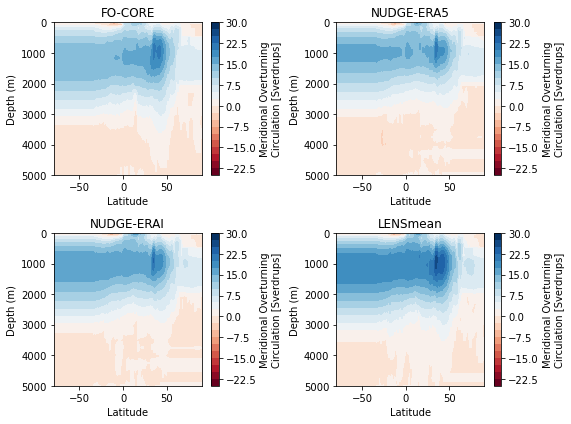

In [7]:
fig = plt.figure(figsize=(8,6))

for n, name in enumerate(mynames):
    
    ax = plt.subplot(2,2,n+1)
    
    ds.sel(names=name).MOC.plot.contourf(ax=ax,levels = np.arange(-25,32.5,2.5),cmap = plt.cm.RdBu, extend = 'neither')
    ax.set_title(labels[n])
    
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('Latitude')
    ax.set_ylim([5000,0])
    
plt.tight_layout()
plt.show()
fig.savefig('figs/suppFig3b.pdf', dpi=500, bbox_inches='tight')
plt.close()

In [8]:
rapid = xr.open_dataset('/glade/work/lettier/RAPID/MOCv2021/moc_vertical_200404_202039.nc')
rapid_mon = rapid.resample(time='1M').mean('time')
rapid_clim = rapid_mon.mean(dim='time')

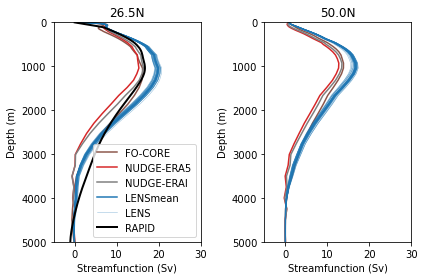

In [9]:
fig = plt.figure()

for l, lat in enumerate([26.5,50.]):
    ax = plt.subplot(1,2,1+l)
    for n, name in enumerate(mynames):
        ax.plot(ds.MOC.interp(lat_aux_grid=lat).sel(names=name),ds.moc_z,**lineplotprop[name])
    
    for n, name in enumerate(ds.names.values):
        if 'LENS' in name and 'mean' not in name:
            ax.plot(ds.MOC.interp(lat_aux_grid=lat).sel(names=name),ds.moc_z,**lineplotprop[name])
 

    if l==0:
        ax.plot(rapid_clim.stream_function_mar, rapid_clim.depth,c='k',label='RAPID',linewidth=2)


    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('Streamfunction (Sv)')      
    ax.set_ylim([5000,0])
    ax.set_xlim([-5,30])
    ax.set_title(str(lat)+'N')
    if l==0:
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())
    
plt.tight_layout()
plt.show()
fig.savefig('figs/suppFig3a.pdf', dpi=500, bbox_inches='tight')
plt.close()


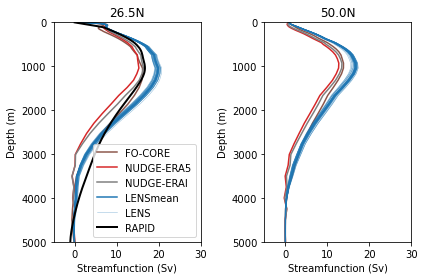

In [9]:
fig = plt.figure()

for l, lat in enumerate([26.5,50.]):
    ax = plt.subplot(1,2,1+l)
    for n, name in enumerate(mynames):
        ax.plot(ds.MOC.interp(lat_aux_grid=lat).sel(names=name),ds.moc_z,**lineplotprop[name])
    
    for n, name in enumerate(ds.names.values):
        if 'LENS' in name and 'mean' not in name:
            ax.plot(ds.MOC.interp(lat_aux_grid=lat).sel(names=name),ds.moc_z,**lineplotprop[name])
 

   # if l==0:
   #     ax.plot(rapid_clim.stream_function_mar, rapid_clim.depth,c='k',label='RAPID',linewidth=2)


    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('Streamfunction (Sv)')      
    ax.set_ylim([5000,0])
    ax.set_xlim([-5,30])
    ax.set_title(str(lat)+'N')
    if l==0:
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())
    
plt.tight_layout()
plt.show()
#fig.savefig('figs/suppFig3a.pdf', dpi=500, bbox_inches='tight')
plt.close()
